In [537]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pylab as plt
import glob
import matplotlib.dates as mdates


In [559]:
def doPlot(aggType,w,h):
    datas = []
    for f in glob.glob("./outputs/" + aggType + "/*.txt"):
        data = pd.read_csv(f,sep=" ")
        data['date'] = pd.to_datetime(data['date'])
        data = data.set_index(["date"])
        datas.append(data)

    isis_boxes = []
    total_boxes = []
    all_data = []
    counts = []
    labels = []
    plots = []
    c = 1

    for data in datas:
        d30 = data.resample('1D').sum()
        d30["isis_perc"] = d30.isis / d30.total
        isis_boxes.append(d30.target_isis)
        total_boxes.append(d30.total + d30.target_total)
        all_data.append(d30)

        counts.append(c)
        c += 1
        labels.append(data.video[0])
        #plt.boxplot([d30.target_total, d30.target_isis, d30.target_happy, d30.target_angry, d30.target_sad])
        plots.append(d30[["target_total","target_isis","target_happy","target_angry","target_sad"]])

    plt.figure(1,figsize=(20,8))
    plt.subplot(111)

    #plt.plot(box.ewm(span=2).mean())
    #plt.legend()
    plt.boxplot(isis_boxes)

    #plt.boxplot(total_boxes)
    #plt.xticks(counts, labels)

    plt.figure(2, figsize=(w, h), dpi=80)
    for i, box in enumerate(isis_boxes):
        plt.subplot(len(isis_boxes),4,4*i+1)
        plt.hist(box,bins=40)
        #rm.head()
        #rm = pd.rolling_mean(box,window=7)
        #plt.hist(rm,bins=80)
        plt.ylabel(str(i+1),rotation='horizontal')

        ax = plt.subplot(len(isis_boxes),4,4*i+2)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
        plt.plot(box)
        #plt.plot(total_boxes[i])
        #plt.plot(all_data[i].target_happy)
        #plt.plot(all_data[i].target_sad + all_data[i].target_angry)
        plt.legend(["isis","happy","sad/angry"],loc='upper left')

        plt.subplot(len(isis_boxes),4,4*i+3)
        plt.hist(box.rolling(min_periods=1,window=14,center=False).mean(),bins=40)
        #rm.head()
        #rm = pd.rolling_mean(box,window=7)
        #plt.hist(rm,bins=80)
        plt.ylabel(str(i+1),rotation='horizontal')

        ax = plt.subplot(len(isis_boxes),4,4*i+4)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
        plt.plot(box.rolling(min_periods=1,window=14,center=False).mean())
        plt.plot(box.resample("7D"))
        plt.plot(box.ewm(halflife=14,ignore_na=False,min_periods=1,adjust=True).mean())

        plt.legend(["isis","total","happy","sad/angry"],loc='upper left')
        #.resample('3D').sum())

    #plt.savefig("hists.png")
    plt.show()

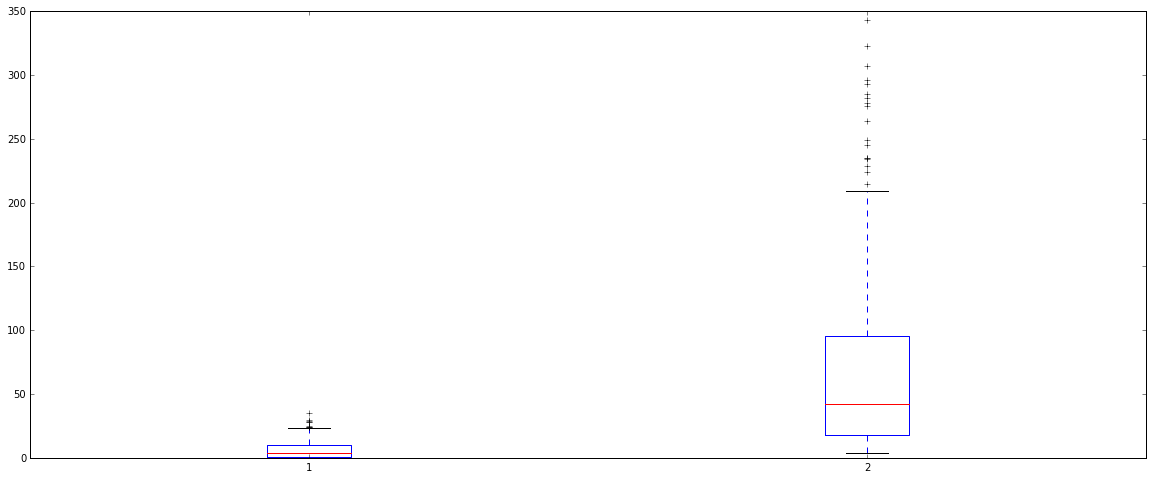

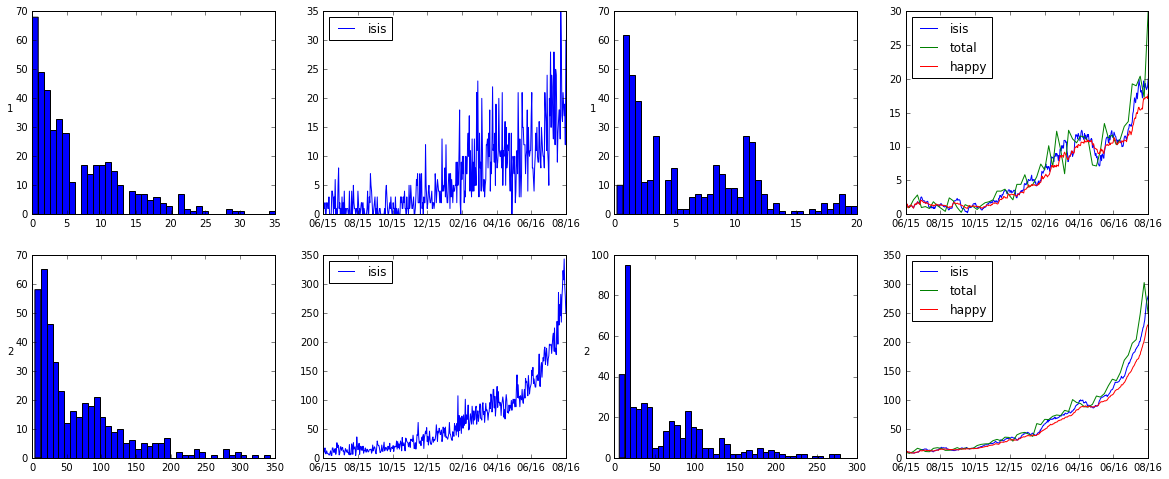

In [560]:
doPlot("by_start_date_ci",20,8)

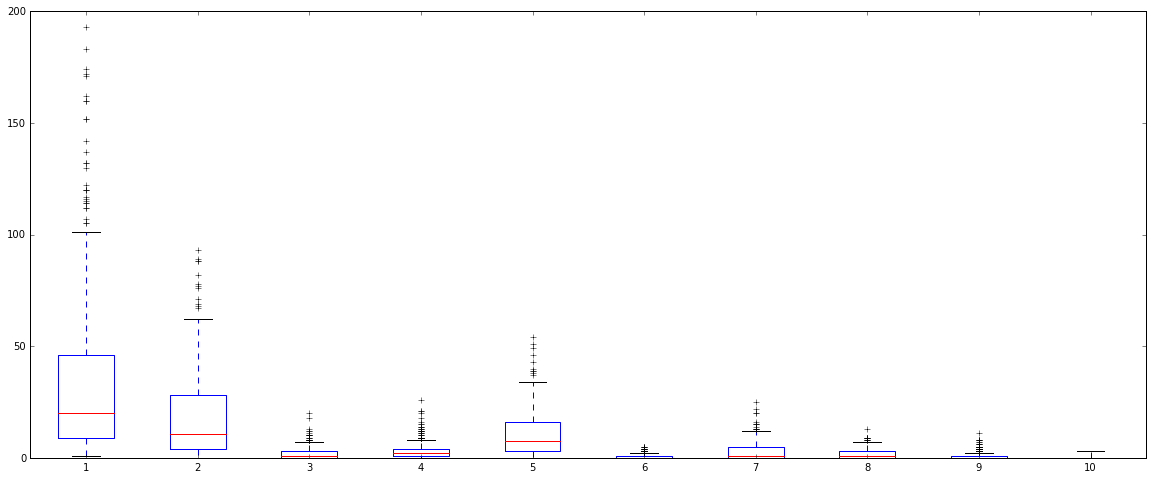

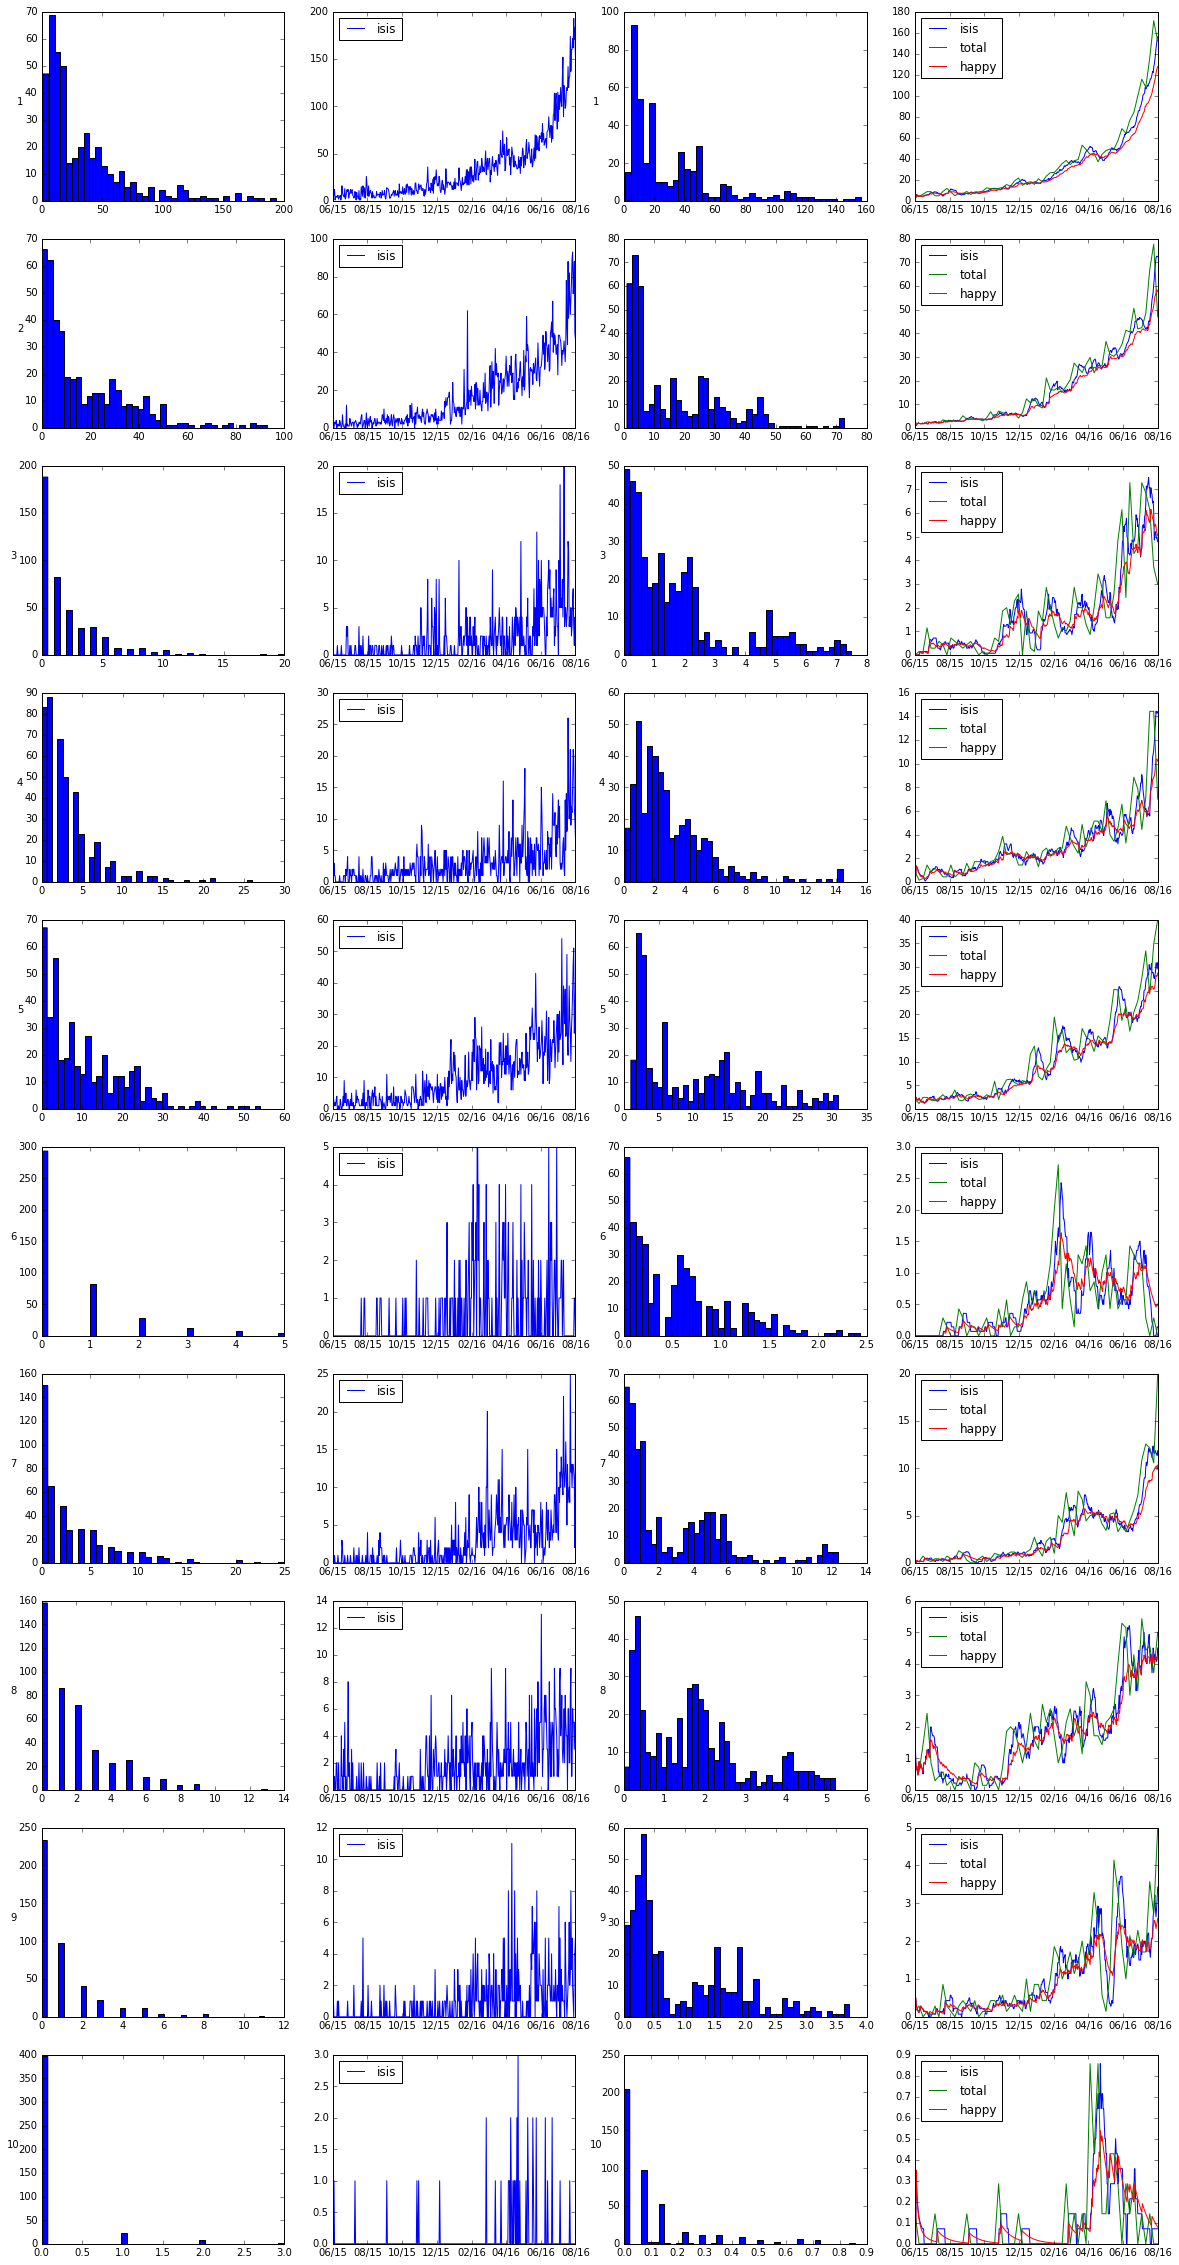

In [561]:
doPlot("by_playlist_ci",20,40)

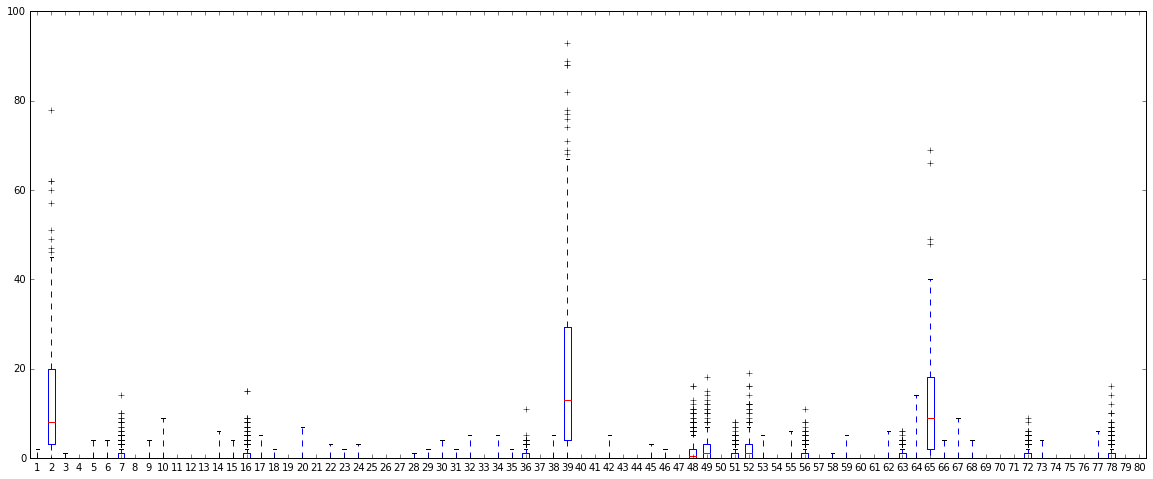

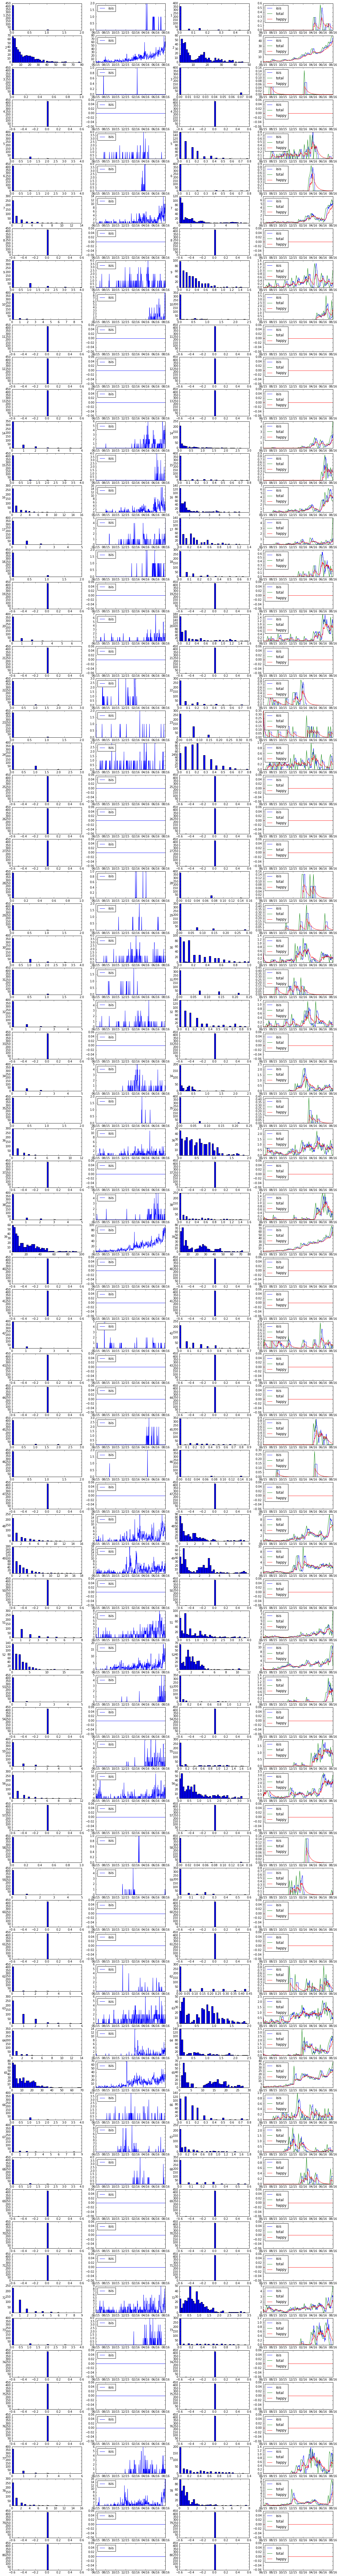

In [562]:
doPlot("ci",20,160)